SamplerateRobustness
----


In [ ]:
!git clone https://github.com/lmnt-com/diffwave.git

Cloning into 'diffwave'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 111 (delta 29), reused 26 (delta 19), pack-reused 61
Receiving objects: 100% (111/111), 33.28 KiB | 11.09 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [ ]:
# requirements
!pip install numpy
!pip install torch 
!pip install torchaudio
!pip install torch torchvision
!pip install tensorboard 
!pip install tqdm
!pip install boto3

In [ ]:
import diffwave # github installation!!!
import torch
import numpy as np
from diffwave.dataset import *
from diffwave.params import params, AttrDict # unconditional parameter not accessible?
from diffwave.preprocess import *
from diffwave.model import *
from diffwave.inference import predict as diffwave_predict
import librosa
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import librosa.display
from scipy.spatial import distance
from statistics import mean
import torchaudio

---- 

----

In [ ]:
# pre processing
pre_process = transform("LJ028-0001_11k.wav")
# getting the 
spectrogram = np.load("/content/LJ028-0001_11k.wav.spec.npy")
model_dir = '/content/diffwave-ljspeech-22kHz-1000578.pt'
x = torch.from_numpy(spectrogram)
audio1, sample_rate = diffwave_predict(x, model_dir, fast_sampling=True)
# Getting MFCCs
audio_data ="/content/LJ028-0001_11k.wav"
x , sr = librosa.load(audio_data)
mfccs11 = librosa.feature.mfcc(x, sr)
audio_data ="/content/LJ028-0001_11k_after.wav"
x , sr = librosa.load(audio_data)
mfccs12 = librosa.feature.mfcc(x, sr)
# calculate teh cosine dist
cosdist11k1=[]
for i in range(mfccs11.shape[0]):
  cosdist11k1.append(distance.cosine(mfccs11[i],mfccs12[i,0:mfccs11.shape[1]]))

# mean the values over several samples
#means
cosdist11k_mean=[]
for i in range(len(cosdist11k8)):
  cosdist11k_mean.append(mean([cosdist11k1[i],cosdist11k2[i],cosdist11k3[i],cosdist11k4[i],cosdist11k5[i],cosdist11k6[i],cosdist11k7[i],cosdist11k8[i],cosdist11k9[i],cosdist11k10[i]]))
#saving
np.save("cosdist11k_mean", cosdist11k_mean)

In [ ]:
def getAudio(audioName):
    print(audioName + ".wav")
    transform(audioName + ".wav")
    spectrogram = np.load(audioName + ".wav.spec.npy")
    model_dir = '/content/diffwave-ljspeech-22kHz-1000578.pt'
    x = torch.from_numpy(spectrogram)
    audio, sr = diffwave_predict(x, model_dir, fast_sampling=True)
    torchaudio.save(audioName + "_after.wav", torch.Tensor.cpu(audio), sr)

def compare(audioName):
    audio1 , sr1 = librosa.load(audioName + ".wav")
    mfccs1 = librosa.feature.mfcc(audio1, sr1)
    audio2 , sr2 = librosa.load(audioName + "_after.wav")
    mfccs2 = librosa.feature.mfcc(audio2, sr2)
    cosDist=[]
    for i in range(mfccs1.shape[0]):
        cosDist.append(distance.cosine(mfccs1[i],mfccs2[i,0:mfccs1.shape[1]]))
    return cosDist

def plotAudio(audioName):
    audio , sr = torchaudio.load(audioName + ".wav")
    plot_waveform(torch.Tensor.cpu(audio), sr)
    plot_specgram(torch.Tensor.cpu(audio), sr)
    play_audio(torch.Tensor.cpu(audio), sr)

In [ ]:
getAudio("LJ028-0001_8k")
cosDist1=compare("LJ028-0001_8k")
getAudio("LJ028-0002_8k")
cosDist2=compare("LJ028-0002_8k")
getAudio("LJ028-0003_8k")
cosDist3=compare("LJ028-0003_8k")
getAudio("LJ028-0004_8k")
cosDist4=compare("LJ028-0004_8k")
getAudio("LJ028-0005_8k")
cosDist5=compare("LJ028-0005_8k")
getAudio("LJ028-0006_8k")
cosDist6=compare("LJ028-0006_8k")
getAudio("LJ028-0007_8k")
cosDist7=compare("LJ028-0007_8k")
getAudio("LJ028-0008_8k")
cosDist8=compare("LJ028-0008_8k")
getAudio("LJ028-0009_8k")
cosDist9=compare("LJ028-0009_8k")
getAudio("LJ028-0010_8k")
cosDist10=compare("LJ028-0010_8k")

LJ028-0001_8k.wav
LJ028-0002_8k.wav
LJ028-0003_8k.wav
LJ028-0004_8k.wav
LJ028-0005_8k.wav
LJ028-0006_8k.wav
LJ028-0007_8k.wav
LJ028-0008_8k.wav
LJ028-0009_8k.wav
LJ028-0010_8k.wav


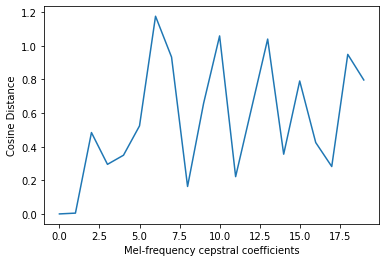

In [ ]:
cosdist8k_mean=[]
for i in range(len(cosDist1)):
  cosdist8k_mean.append(mean([cosDist1[i],cosDist2[i],cosDist3[i],cosDist4[i],cosDist5[i],cosDist6[i],cosDist7[i],cosDist8[i],cosDist9[i],cosDist10[i]]))
#saving
np.save("cosdist8k_mean", cosdist8k_mean)
# plotting
plt.plot(cosdist8k_mean)
plt.ylabel('Cosine Distance')
plt.xlabel('Mel-frequency cepstral coefficients')
plt.show()

LJ028-0001_16k.wav
LJ028-0002_16k.wav
LJ028-0003_16k.wav
LJ028-0004_16k.wav
LJ028-0005_16k.wav
LJ028-0006_16k.wav
LJ028-0007_16k.wav
LJ028-0008_16k.wav
LJ028-0009_16k.wav
LJ028-0010_16k.wav


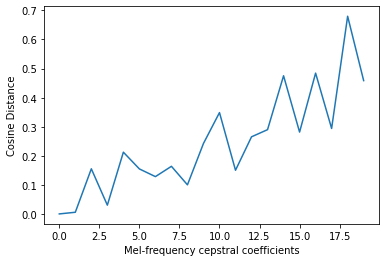

In [ ]:
getAudio("LJ028-0001_16k")
cosDist1=compare("LJ028-0001_16k")
getAudio("LJ028-0002_16k")
cosDist2=compare("LJ028-0002_16k")
getAudio("LJ028-0003_16k")
cosDist3=compare("LJ028-0003_16k")
getAudio("LJ028-0004_16k")
cosDist4=compare("LJ028-0004_16k")
getAudio("LJ028-0005_16k")
cosDist5=compare("LJ028-0005_16k")
getAudio("LJ028-0006_16k")
cosDist6=compare("LJ028-0006_16k")
getAudio("LJ028-0007_16k")
cosDist7=compare("LJ028-0007_16k")
getAudio("LJ028-0008_16k")
cosDist8=compare("LJ028-0008_16k")
getAudio("LJ028-0009_16k")
cosDist9=compare("LJ028-0009_16k")
getAudio("LJ028-0010_16k")
cosDist10=compare("LJ028-0010_16k")
cosdist16k_mean=[]
for i in range(len(cosDist1)):
  cosdist16k_mean.append(mean([cosDist1[i],cosDist2[i],cosDist3[i],cosDist4[i],cosDist5[i],cosDist6[i],cosDist7[i],cosDist8[i],cosDist9[i],cosDist10[i]]))
#saving
np.save("cosdist16k_mean", cosdist16k_mean)
# plotting
plt.plot(cosdist16k_mean)
plt.ylabel('Cosine Distance')
plt.xlabel('Mel-frequency cepstral coefficients')
plt.show()

LJ028-0001_32k.wav
LJ028-0002_32k.wav
LJ028-0003_32k.wav
LJ028-0004_32k.wav
LJ028-0005_32k.wav
LJ028-0006_32k.wav
LJ028-0007_32k.wav
LJ028-0008_32k.wav
LJ028-0009_32k.wav
LJ028-0010_32k.wav


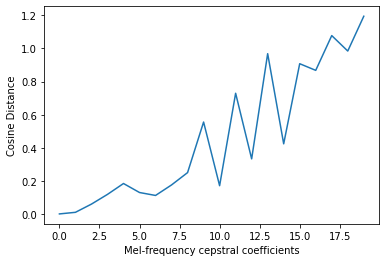

In [ ]:
getAudio("LJ028-0001_32k")
cosDist1=compare("LJ028-0001_32k")
getAudio("LJ028-0002_32k")
cosDist2=compare("LJ028-0002_32k")
getAudio("LJ028-0003_32k")
cosDist3=compare("LJ028-0003_32k")
getAudio("LJ028-0004_32k")
cosDist4=compare("LJ028-0004_32k")
getAudio("LJ028-0005_32k")
cosDist5=compare("LJ028-0005_32k")
getAudio("LJ028-0006_32k")
cosDist6=compare("LJ028-0006_32k")
getAudio("LJ028-0007_32k")
cosDist7=compare("LJ028-0007_32k")
getAudio("LJ028-0008_32k")
cosDist8=compare("LJ028-0008_32k")
getAudio("LJ028-0009_32k")
cosDist9=compare("LJ028-0009_32k")
getAudio("LJ028-0010_32k")
cosDist10=compare("LJ028-0010_32k")
cosdist32k_mean=[]
for i in range(len(cosDist1)):
  cosdist32k_mean.append(mean([cosDist1[i],cosDist2[i],cosDist3[i],cosDist4[i],cosDist5[i],cosDist6[i],cosDist7[i],cosDist8[i],cosDist9[i],cosDist10[i]]))
#saving
np.save("cosdist32k_mean", cosdist32k_mean)
# plotting
plt.plot(cosdist32k_mean)
plt.ylabel('Cosine Distance')
plt.xlabel('Mel-frequency cepstral coefficients')
plt.show()

LJ028-0001_48k.wav
LJ028-0002_48k.wav
LJ028-0003_48k.wav
LJ028-0004_48k.wav
LJ028-0005_48k.wav
LJ028-0006_48k.wav
LJ028-0007_48k.wav
LJ028-0008_48k.wav
LJ028-0009_48k.wav
LJ028-0010_48k.wav


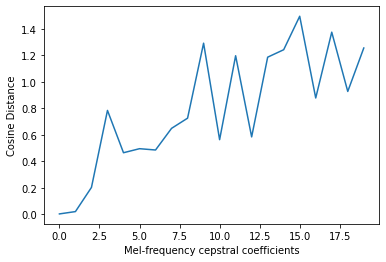

In [ ]:
getAudio("LJ028-0001_48k")
cosDist1=compare("LJ028-0001_48k")
getAudio("LJ028-0002_48k")
cosDist2=compare("LJ028-0002_48k")
getAudio("LJ028-0003_48k")
cosDist3=compare("LJ028-0003_48k")
getAudio("LJ028-0004_48k")
cosDist4=compare("LJ028-0004_48k")
getAudio("LJ028-0005_48k")
cosDist5=compare("LJ028-0005_48k")
getAudio("LJ028-0006_48k")
cosDist6=compare("LJ028-0006_48k")
getAudio("LJ028-0007_48k")
cosDist7=compare("LJ028-0007_48k")
getAudio("LJ028-0008_48k")
cosDist8=compare("LJ028-0008_48k")
getAudio("LJ028-0009_48k")
cosDist9=compare("LJ028-0009_48k")
getAudio("LJ028-0010_48k")
cosDist10=compare("LJ028-0010_48k")
cosdist48k_mean=[]
for i in range(len(cosDist1)):
  cosdist48k_mean.append(mean([cosDist1[i],cosDist2[i],cosDist3[i],cosDist4[i],cosDist5[i],cosDist6[i],cosDist7[i],cosDist8[i],cosDist9[i],cosDist10[i]]))
#saving
np.save("cosdist48k_mean", cosdist48k_mean)
# plotting
plt.plot(cosdist48k_mean)
plt.ylabel('Cosine Distance')
plt.xlabel('Mel-frequency cepstral coefficients')
plt.show()

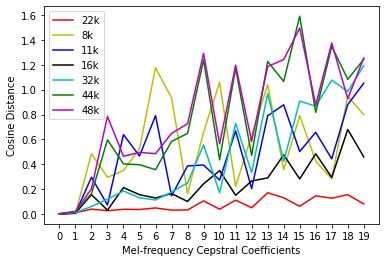

In [ ]:
# plotting together
cosdist8k_mean=np.load("/content/cosdist8k_mean.npy")
cosdist11k_mean=np.load("/content/cosdist11k_mean.npy")
cosdist16k_mean=np.load("/content/cosdist16k_mean.npy")
cosdist22k_mean=np.load("/content/cosdist22k_mean.npy")
cosdist32k_mean=np.load("/content/cosdist32k_mean.npy")
cosdist44k_mean=np.load("/content/cosdist44k_mean.npy")
cosdist48k_mean=np.load("/content/cosdist48k_mean.npy")
plt.plot(cosdist22k_mean, 'r', cosdist8k_mean, 'y',cosdist11k_mean, 'b',cosdist16k_mean, 'k',cosdist32k_mean, 'c',cosdist44k_mean, 'g',cosdist48k_mean, 'm')
plt.ylabel('Cosine Distance')
plt.xlabel('Mel-frequency Cepstral Coefficients')
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=40,integer=True))
plt.gca().legend(('22k','8k','11k','16k','32k','44k','48k'))
plt.show()

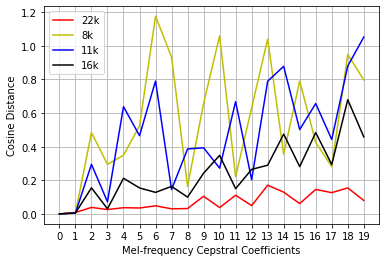

In [ ]:
# Plotting downsamples together
# plotting together
cosdist8k_mean=np.load("/content/cosdist8k_mean.npy")
cosdist11k_mean=np.load("/content/cosdist11k_mean.npy")
cosdist16k_mean=np.load("/content/cosdist16k_mean.npy")
cosdist22k_mean=np.load("/content/cosdist22k_mean.npy")
plt.plot(cosdist22k_mean, 'r', cosdist8k_mean, 'y',cosdist11k_mean, 'b',cosdist16k_mean,'k')
plt.ylabel('Cosine Distance')
plt.xlabel('Mel-frequency Cepstral Coefficients')
plt.gca().legend(('22k','8k','11k','16k'))
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=40,integer=True))
plt.grid(visible=True)
plt.savefig('SRds.png', dpi=300)
plt.show()


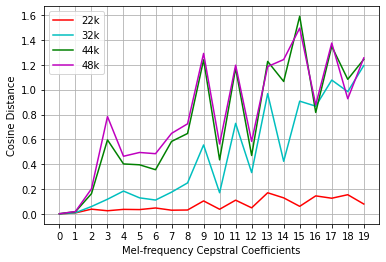

In [ ]:
cosdist22k_mean=np.load("/content/cosdist22k_mean.npy")
cosdist32k_mean=np.load("/content/cosdist32k_mean.npy")
cosdist44k_mean=np.load("/content/cosdist44k_mean.npy")
cosdist48k_mean=np.load("/content/cosdist48k_mean.npy")
plt.plot(cosdist22k_mean, 'r',cosdist32k_mean, 'c',cosdist44k_mean, 'g',cosdist48k_mean, 'm')
plt.ylabel('Cosine Distance')
plt.xlabel('Mel-frequency Cepstral Coefficients')
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=40,integer=True))
plt.gca().legend(('22k','32k','44k','48k'))
plt.grid(visible=True)
plt.savefig('SRus.png', dpi=300)
plt.show()
